# Polynomial Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
X = np.arange(-10,10,0.2)
y = 2*np.cos(X)/(-np.pi) + (2*X)/(2*np.pi)+2*np.cos(3*X)/(-3*np.pi)
print(X)
print(y)

[-1.00000000e+01 -9.80000000e+00 -9.60000000e+00 -9.40000000e+00
 -9.20000000e+00 -9.00000000e+00 -8.80000000e+00 -8.60000000e+00
 -8.40000000e+00 -8.20000000e+00 -8.00000000e+00 -7.80000000e+00
 -7.60000000e+00 -7.40000000e+00 -7.20000000e+00 -7.00000000e+00
 -6.80000000e+00 -6.60000000e+00 -6.40000000e+00 -6.20000000e+00
 -6.00000000e+00 -5.80000000e+00 -5.60000000e+00 -5.40000000e+00
 -5.20000000e+00 -5.00000000e+00 -4.80000000e+00 -4.60000000e+00
 -4.40000000e+00 -4.20000000e+00 -4.00000000e+00 -3.80000000e+00
 -3.60000000e+00 -3.40000000e+00 -3.20000000e+00 -3.00000000e+00
 -2.80000000e+00 -2.60000000e+00 -2.40000000e+00 -2.20000000e+00
 -2.00000000e+00 -1.80000000e+00 -1.60000000e+00 -1.40000000e+00
 -1.20000000e+00 -1.00000000e+00 -8.00000000e-01 -6.00000000e-01
 -4.00000000e-01 -2.00000000e-01 -3.55271368e-14  2.00000000e-01
  4.00000000e-01  6.00000000e-01  8.00000000e-01  1.00000000e+00
  1.20000000e+00  1.40000000e+00  1.60000000e+00  1.80000000e+00
  2.00000000e+00  2.20000

### ADD noise_white_noise

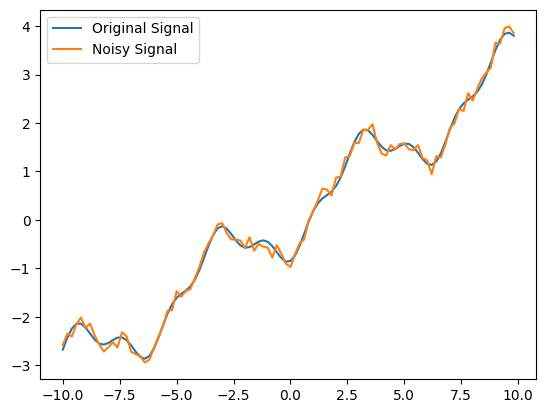

In [4]:
# Generate white noise with the same length as y
noise = np.random.randn(len(y))

# Multiply the white noise by 0.1
noise *= 0.1

# Multiply the original signal by the noise-modified signal
y_noisy = y + noise
# y_noisy = y *( 1 + noise )

# Plot the original signal and the noisy signal
import matplotlib.pyplot as plt
plt.plot(X, y, label='Original Signal')
plt.plot(X, y_noisy, label='Noisy Signal')
plt.legend()
plt.show()

### ADD noise_Poisson_noise

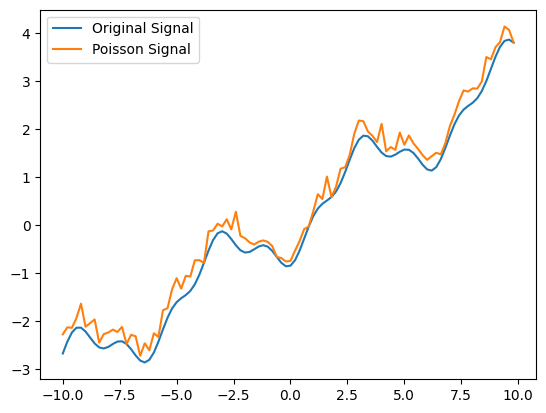

In [5]:
# Generate Poisson-distributed noise with lambda=2
poisson = np.random.poisson(lam=2, size=len(y))


# Modify the original signal with Poisson noise
y_poisson = y + 0.1*poisson

# Plot the original signal and the noisy signal
import matplotlib.pyplot as plt
plt.plot(X, y, label='Original Signal')
plt.plot(X, y_poisson, label='Poisson Signal')
plt.legend()
plt.show()


### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_poisson, y_test_poisson = train_test_split(X, y_poisson, test_size = 0.2, random_state = 42)
X_train, X_test, y_train_noisy, y_test_noisy = train_test_split(X, y_noisy, test_size = 0.2, random_state = 42)

## Training the poly Regression model for white noise

degree =  1 train mse =  0.26771108348933365 test mse =  0.28003451421474357
degree =  2 train mse =  0.2487550624892941 test mse =  0.2656941634748907
degree =  3 train mse =  0.2483644017310239 test mse =  0.26913772485455134
degree =  4 train mse =  0.196960668925193 test mse =  0.1920265128554382
degree =  5 train mse =  0.19619843565579803 test mse =  0.19326265967877293
degree =  6 train mse =  0.17394124599983093 test mse =  0.21134994978221727
degree =  7 train mse =  0.17386533041904073 test mse =  0.21548701725519565
degree =  8 train mse =  0.06862220305765028 test mse =  0.06854959188638675
degree =  9 train mse =  0.06848019794052991 test mse =  0.07296254515458053
degree =  10 train mse =  0.034349556166334984 test mse =  0.049174853025231266
degree =  11 train mse =  0.03408498065065172 test mse =  0.061359588850015835
degree =  12 train mse =  0.027480565064376482 test mse =  0.02491490438925687
degree =  13 train mse =  0.027472871099051943 test mse =  0.02531389803550

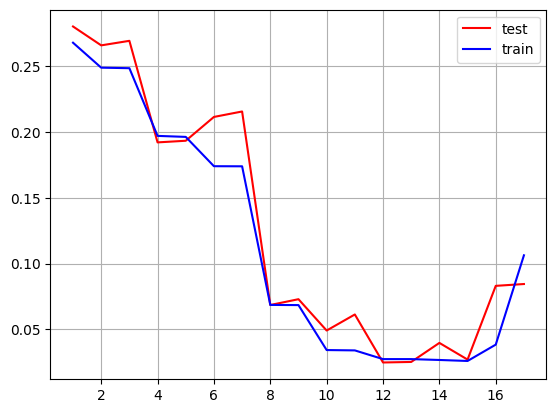

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

tests_mse = []
trains_mse = []
i_list = []
for i in range(0 ,18):
  lin_reg = LinearRegression()
  poly_reg = PolynomialFeatures(degree = i)
  X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))
  lin_reg_2 = LinearRegression()
  lin_reg_2.fit(X_poly, y_train_noisy)
  i_list.append(i)
  trains_mse.append(mean_squared_error(y_train_noisy, lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1)))))
  tests_mse.append(mean_squared_error(y_test_noisy, lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1)))))
for i in range(1 ,16):
  print("degree = ",  i_list[i], "train mse = " , trains_mse[i], "test mse = " , tests_mse[i])
plt.plot(i_list[1:], tests_mse[1:], color = 'red')
plt.plot(i_list[1:], trains_mse[1:], color = 'blue')
plt.legend(['test','train'])
plt.grid(True)
plt.show()


##Training with example degrees

train error 0.26771108348933365 for degree =  1
test error 0.28003451421474357 for degree =  1
train bias 3.8059052729867036 for degree =  1
test bias 2.7489424186844857 for degree =  1
train variance 3.538194189497368 for degree =  1
test variance 3.402075099370019 for degree =  1


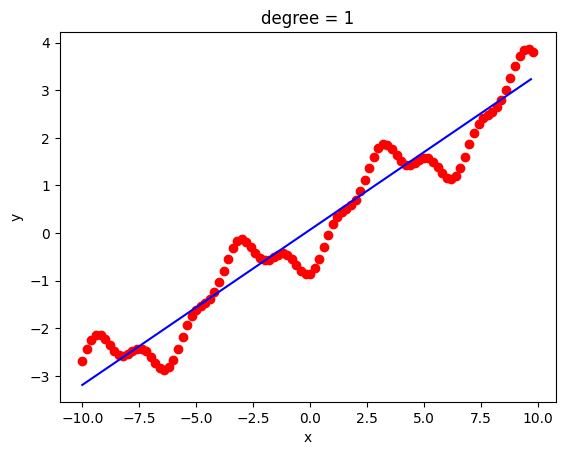

train error 0.2483644017310239 for degree =  3
test error 0.26913772485455134 for degree =  3
train bias 3.8059052729867036 for degree =  3
test bias 2.750018463258655 for degree =  3
train variance 3.557540871255682 for degree =  3
test variance 3.2522898215326506 for degree =  3


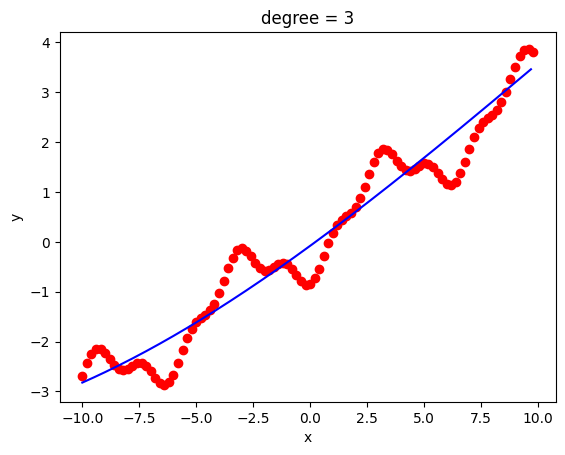

train error 0.06862220305765028 for degree =  8
test error 0.06854959188638675 for degree =  8
train bias 3.805905272986705 for degree =  8
test bias 2.7356623615027362 for degree =  8
train variance 3.737283069715063 for degree =  8
test variance 3.1792038567492833 for degree =  8


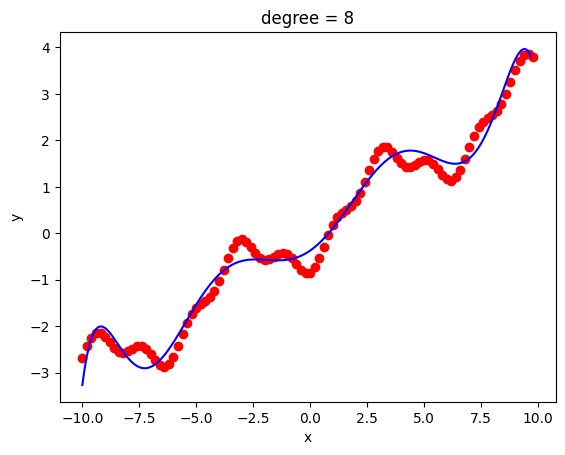

train error 0.02606255491795073 for degree =  15
test error 0.027113970890772117 for degree =  15
train bias 3.8059052729867036 for degree =  15
test bias 2.7347946410387145 for degree =  15
train variance 3.804939340687141 for degree =  15
test variance 2.8510911902094835 for degree =  15


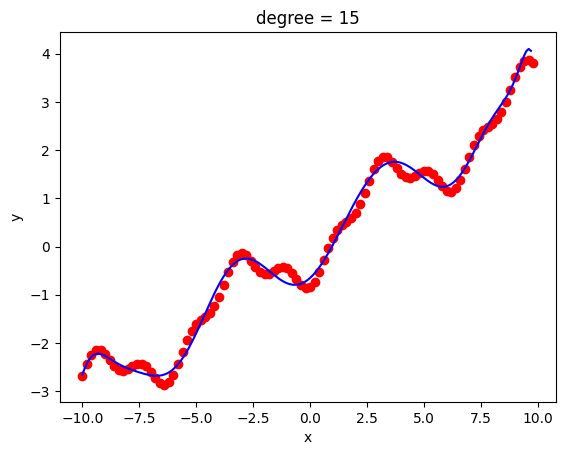

In [37]:
i_list = [1,3,8,15]
for i in i_list:
  lin_reg = LinearRegression()
  poly_reg = PolynomialFeatures(degree = i)
  X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))
  lin_reg_2 = LinearRegression()
  lin_reg_2.fit(X_poly, y_train_noisy)
  X_grid = np.arange(min(X), max(X), 0.1)
  X_grid = X_grid.reshape((len(X_grid), 1))
  plt.scatter(X, y, color = 'red')
  plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
  print("train error" , mean_squared_error(y_train_noisy, lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1)))),"for degree = ", str(i))
  print("test error" , (mean_squared_error(y_test_noisy, lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1))))),"for degree = ", str(i))
  print("train bias" , (np.mean((y_train_noisy - np.mean(lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1))), axis=0)) ** 2)),"for degree = ", str(i))
  print("test bias" , (np.mean((y_test_noisy - np.mean(lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1))), axis=0)) ** 2)),"for degree = ", str(i))
  print("train variance" , np.mean(np.var(lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1))), axis=0)),"for degree = ", str(i))
  print("test variance" , np.mean(np.var(lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1))), axis=0)),"for degree = ", str(i))
  plt.title('degree = ' + str(i) )
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

## Training the poly Regression model for poisson

degree =  1 train mse =  0.27899075159837106 test mse =  0.2562824019970868
degree =  2 train mse =  0.2572387573237461 test mse =  0.23342995831507127
degree =  3 train mse =  0.2572374978964856 test mse =  0.2334719405449146
degree =  4 train mse =  0.22460239235841523 test mse =  0.1764418787938821
degree =  5 train mse =  0.22451549219816944 test mse =  0.17680117752547123
degree =  6 train mse =  0.20008539506632445 test mse =  0.19933412525812227
degree =  7 train mse =  0.19982793116955377 test mse =  0.2063716047648681
degree =  8 train mse =  0.07940775335109318 test mse =  0.07890323532953271
degree =  9 train mse =  0.07915632234536757 test mse =  0.08827466194308925
degree =  10 train mse =  0.038407013798615705 test mse =  0.0640046654436259
degree =  11 train mse =  0.037428579956825414 test mse =  0.09542133194367129
degree =  12 train mse =  0.029935434446202436 test mse =  0.054252790784845226
degree =  13 train mse =  0.02989593338534775 test mse =  0.0537285881892496

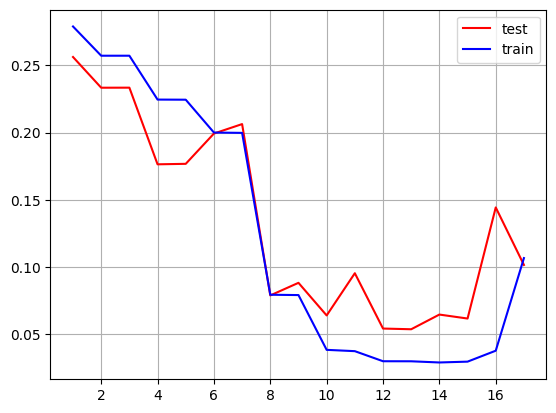

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

tests_mse = []
trains_mse = []
i_list = []
for i in range(0 ,18):
  lin_reg = LinearRegression()
  poly_reg = PolynomialFeatures(degree = i)
  X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))
  lin_reg_2 = LinearRegression()
  lin_reg_2.fit(X_poly, y_train_poisson)
  i_list.append(i)
  trains_mse.append(mean_squared_error(y_train_poisson, lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1)))))
  tests_mse.append(mean_squared_error(y_test_poisson, lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1)))))
for i in range(1 ,16):
  print("degree = ",  i_list[i], "train mse = " , trains_mse[i], "test mse = " , tests_mse[i])
plt.plot(i_list[1:], tests_mse[1:], color = 'red')
plt.plot(i_list[1:], trains_mse[1:], color = 'blue')
plt.legend(['test','train'])
plt.grid(True)
plt.show()


##Training with example degrees

train error 0.27899075159837106 for degree =  1
test error 0.2562824019970868 for degree =  1
train bias 3.709691122170284 for degree =  1
test bias 2.6917654980254904 for degree =  1
train variance 3.4307003705719112 for degree =  1
test variance 3.298716712261696 for degree =  1


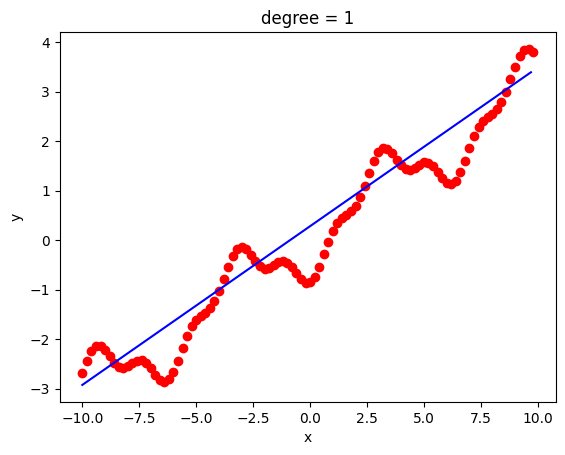

train error 0.2572374978964856 for degree =  3
test error 0.2334719405449146 for degree =  3
train bias 3.709691122170284 for degree =  3
test bias 2.691843051255867 for degree =  3
train variance 3.452453624273801 for degree =  3
test variance 3.1243181602293317 for degree =  3


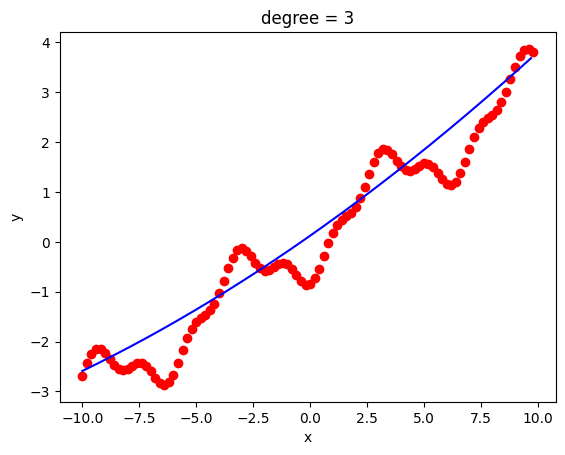

train error 0.22460239235841523 for degree =  4
test error 0.1764418787938821 for degree =  4
train bias 3.709691122170284 for degree =  4
test bias 2.689631528039265 for degree =  4
train variance 3.4850887298119004 for degree =  4
test variance 2.8276402208995917 for degree =  4


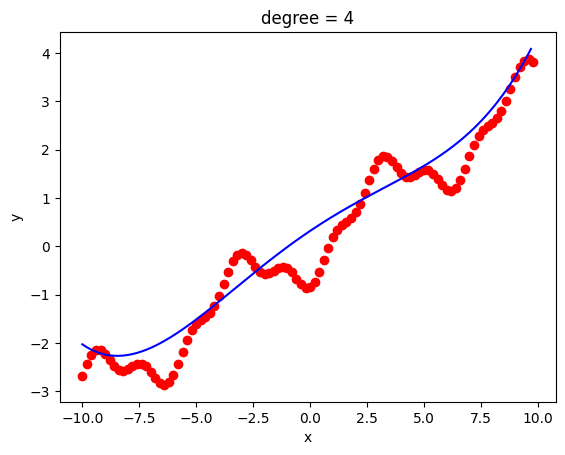

train error 0.07940775335109318 for degree =  8
test error 0.07890323532953271 for degree =  8
train bias 3.709691122170284 for degree =  8
test bias 2.689729284156079 for degree =  8
train variance 3.6302833682213773 for degree =  8
test variance 3.150727058311132 for degree =  8


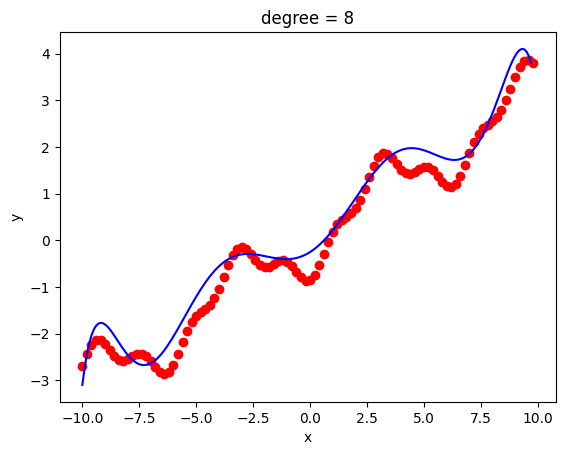

train error 0.029633805725978457 for degree =  15
test error 0.06169862538875903 for degree =  15
train bias 3.709691122170284 for degree =  15
test bias 2.691260993173508 for degree =  15
train variance 3.7518429051758373 for degree =  15
test variance 2.829646644909956 for degree =  15


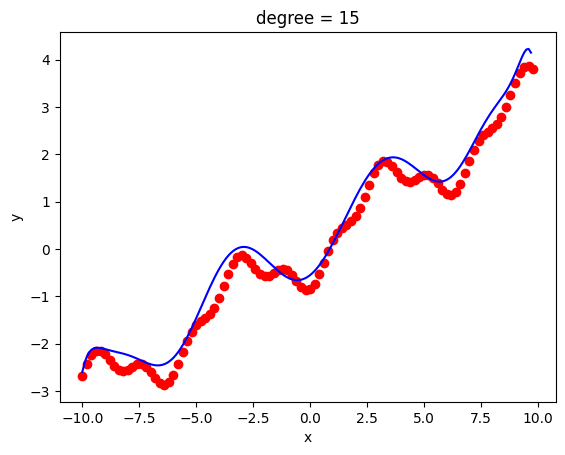

In [38]:
i_list = [1,3,4,8,15]
for i in i_list:
  lin_reg = LinearRegression()
  poly_reg = PolynomialFeatures(degree = i)
  X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))
  lin_reg_2 = LinearRegression()
  lin_reg_2.fit(X_poly, y_train_poisson)
  X_grid = np.arange(min(X), max(X), 0.1)
  X_grid = X_grid.reshape((len(X_grid), 1))
  plt.scatter(X, y, color = 'red')
  plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
  print("train error" , mean_squared_error(y_train_poisson, lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1)))),"for degree = ", str(i))
  print("test error" , (mean_squared_error(y_test_poisson, lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1))))),"for degree = ", str(i))
  print("train bias" , (np.mean((y_train_poisson - np.mean(lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1))), axis=0)) ** 2)),"for degree = ", str(i))
  print("test bias" , (np.mean((y_test_poisson - np.mean(lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1))), axis=0)) ** 2)),"for degree = ", str(i))
  print("train variance" , np.mean(np.var(lin_reg_2.predict(poly_reg.fit_transform(X_train.reshape(-1, 1))), axis=0)),"for degree = ", str(i))
  print("test variance" , np.mean(np.var(lin_reg_2.predict(poly_reg.fit_transform(X_test.reshape(-1, 1))), axis=0)),"for degree = ", str(i))
  plt.title('degree = ' + str(i) )
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()